<a href="https://colab.research.google.com/github/rbarrientos256/Prueba_vsc/blob/main/Regresi%C3%B3n_L%C3%ADneal_Medicamentos_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar Bibliotecas para regresión logística

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix



In [2]:
data = pd.read_excel('FarmaciasMaipu_Ventas_feb2023_a_ene2025_limp_sds.xlsx')
data.head()


,Fraccionado,Número,N° Voucher o Boleta,Fecha,Mes,Año,Proveedor,ID_Producto,Código,Producto,...,Uso/Tratamiento,Lote,Cantidad,Valor Neto,V.Unit.,SubTotal,Total,Valor Costo,Tipo de Pago,Previsión
0,Unchecked,6305,9807,2023-02-28 14:17:36,Febrero,2023,DEUTSCHE PHARMA S.A,155826,7795380002425,"LIBRAXIN 5MG / 2,5MG X 30 COMPRIMIDOS",...,ANTIESPASMÓDICOS ANTICOLINÉRGICOS,00043,1,3597,4280,4280,4280,2460.0,Transbank Débito,ISAPRE
1,Checked,6303,365864,2023-02-28 13:16:00,Febrero,2023,NaN,155723,7226,MONDRIAN SR 150 MG X COMP REC LP,...,TRATAMIENTO DEL TABAQUISMO/ALCOHOLISMO,J22024A,30,67,80,2400,2400,65.0,Transbank Débito,FONASA
2,Unchecked,6302,908287,2023-02-28 16:03:33,Febrero,2023,NaN,155607,7804625951890,"REDUCLIM 2,5 MG X 30 COMP",...,NaN,221825,1,3496,4160,4160,4160,3850.0,Transbank Débito,FONASA
3,Checked,6302,908287,2023-02-28 16:03:33,Febrero,2023,NaN,155714,7804620836055,LOSARTAN 50 MG X COMP REC,...,ANTIHIPERTENSIVO,EM2G193,60,8,10,600,600,9.7,Transbank Débito,FONASA
4,Checked,6301,335043,2023-02-28 15:41:03,Febrero,2023,NaN,156454,NaN,TROMBEX 20 MG X COMP REC,...,ANTICOAGULANTE,M2211434,30,261,310,9300,9300,260.0,Transbank Débito,FONASA


In [18]:
data_filtrada = data[data['Fraccionado']=='Unchecked']

In [19]:
data_filtrada.head()

,Fraccionado,Número,N° Voucher o Boleta,Fecha,Mes,Año,Proveedor,ID_Producto,Código,Producto,...,Lote,Cantidad,Valor Neto,V.Unit.,SubTotal,Total,Valor Costo,Tipo de Pago,Previsión,Producto_Encoded
0,Unchecked,6305,9807,2023-02-28 14:17:36,Febrero,2023,DEUTSCHE PHARMA S.A,155826,7795380002425,"LIBRAXIN 5MG / 2,5MG X 30 COMPRIMIDOS",...,00043,1,3597,4280,4280,4280,2460.0,Transbank Débito,ISAPRE,731
2,Unchecked,6302,908287,2023-02-28 16:03:33,Febrero,2023,NaN,155607,7804625951890,"REDUCLIM 2,5 MG X 30 COMP",...,221825,1,3496,4160,4160,4160,3850.0,Transbank Débito,FONASA,921
6,Unchecked,6300,365864,2023-02-28 13:16:00,Febrero,2023,LABORATORIO ANDROMACO,155581,7800018000831,NAPROXENO 550 MG X 10 COMP REC,...,e22012a,1,571,680,680,680,630.0,Transbank Débito,FONASA,807
7,Unchecked,6300,365864,2023-02-28 13:16:00,Febrero,2023,NaN,157271,7804650884361,METFORMINA 1000 MG X 60 COMP LP,...,B20336,1,1798,2140,2140,2140,2183.0,Transbank Débito,FONASA,769
8,Unchecked,6300,365864,2023-02-28 13:16:00,Febrero,2023,NaN,155599,7804650881223,PREGABALINA 150 MG X 30 CAP,...,22143031,1,1076,1280,1280,1280,848.0,Transbank Débito,FONASA,882


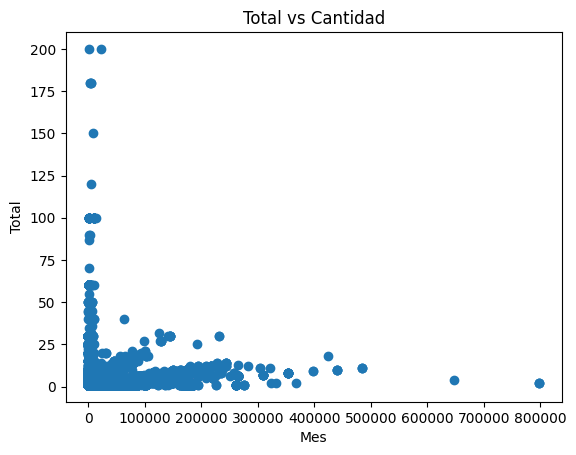

In [20]:
plt.scatter(data_filtrada['Total'],
data_filtrada['Cantidad'])
plt.xlabel('Mes')
plt.ylabel('Total')
plt.title('Total vs Cantidad')
plt.show()

In [8]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the 'Producto' column and transform it
data['Producto_Encoded'] = label_encoder.fit_transform(data['Producto'])

In [22]:
# Dividir los datos en conjunto de entrenamiento y prueba

X = data_filtrada['Total'].values.reshape(-1, 1)
y = data_filtrada['Cantidad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Crear modelo de regresión lineal

model = LinearRegression()

In [24]:
# Entrenar el modelo con los datos de entrenamiento

model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 21.83523025277762


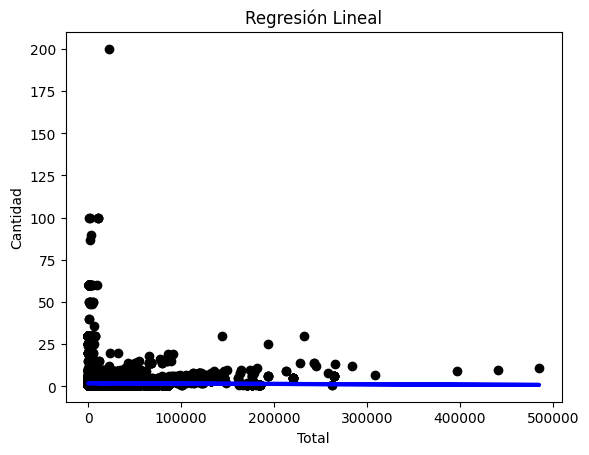

In [27]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Total')
plt.ylabel('Cantidad')
plt.title('Regresión Lineal')
plt.show()

In [28]:
# realizar predicciones para nuevos valores

nuevos_valores = np.array([[500]])
prediccion_nuevo =model.predict(nuevos_valores)
print('Predicción para nuevos valores:', prediccion_nuevo)

Predicción para nuevos valores: [1.8948995]
